# <center>Rain Prediction In Australia (Classification Exercise Using Python)<center>

<center>As part of my IBM Data Science Professional Certificate, I have been tasked with producing a fully functional Jupyter notebook showcasing some examples of machine learning (ML) models I have come across on the course. <br>    
    
This exercise will be focusing on a raw dataset extracted from the Australian Government's Bureau of Meteorology that will require me to clean / pre-process the data, implement different types of ML models to the data and finally apply statistical tests to evaluate how effective each of the model is. <center>

## <u>Importing & Pre-Processing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')
df.shape

(3271, 22)

There are 3,271 rows in our dataset. Let's look at the first 10 rows only

In [3]:
df.head(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,...,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,...,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,...,77,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,...,92,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,...,80,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


The snippet of table produced is rather hard to read. We can transpose the first row only in an easy to read way

In [4]:
df.head(1).transpose()

,0
Date,2/1/2008
MinTemp,19.5
MaxTemp,22.4
Rainfall,15.6
Evaporation,6.2
Sunshine,0.0
WindGustDir,W
WindGustSpeed,41
WindDir9am,S
WindDir3pm,SSW


By reviewing the first row, all columns look populated which is good. Let's check the remainder of the rows for null values and the data types for each column

In [5]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

Using both the `isnull()` and `info()` command we can see that there is no null values present. Not only this, but we can see that 6 columns consist of string / object data types. For simplicity we'll be removing most of these columns when modelling

*As a side note, if we wanted to preserve as much data as possible in our dataframe, we could have used a technique called **"One Hot Encoding"** that would've converted the string columns to numerical columns via binary inputs (1 or 0).*

Let's get a list of all the string columns and look to remove them from the main dataframe

In [7]:
df.select_dtypes('O').columns.to_list()

['Date',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
columns_remove = ['Date','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df_lean = df.drop(columns_remove, axis=1)
df_lean.shape

(3271, 17)

Notice from the 6 string columns, we removed just the 5. The final column, "RainTomorrow" is our **dependent variable** which we'll be using in our machine learning models to predict that outcome (if there will be rain tomorrow)<br>

However, we do need to amend this column as machine learning is not a fan of string values. To overcome this, we'll be reassigning the string values to numbers.<br>

Let's see what string values we've got in our dependent column 

In [9]:
df_lean['RainTomorrow'].value_counts()

No     2422
Yes     849
Name: RainTomorrow, dtype: int64

As we can see above, we have two possible outcomes for our dependent variable, Yes or No. We can encode this using binary numbers of 1 and 0 respectively. 

In [10]:
df_lean.replace(['No', 'Yes'], [0,1], inplace=True)

When the dependent variable is categoric like above this is known as a **classification problem**. Usually, the go to model is a **Logistic Regression Model**, however for the purpose of this exercise we'll be looking at numerous other models (notably Multiple Linear Regression which is more used when the dependent variable is of continuous data). <br>

One final step before we start modelling is to compare the original dataframe to our modified one. 

In [11]:
print("Number Rows In Initial DataFrame:" , df.shape[0])
print("Number Rows In New DataFrame:" , df_lean.shape[0])
print("Number Columns In Initial DataFrame:" , df.shape[1])
print("Number Columns In New DataFrame:" , df_lean.shape[1])

Number Rows In Initial DataFrame: 3271
Number Rows In New DataFrame: 3271
Number Columns In Initial DataFrame: 22
Number Columns In New DataFrame: 17


## <u>1) Multiple Linear Regression

Our first Machine Learning (ML) model we'll be focusing on is **Multiple Linear Regression (MLR)**. With MLR it is required to pick 2 or more independent variables to help predict the dependent variable (Rain Tomorrow in our case).<br>

There is numerous methods we can use to help us decide which independent variables to select, but the method we're going to use is the **"Filter Method"** which utilises the Pearson correlation coefficient. <b>
    
Let us analyse the coefficients for each of the columns 

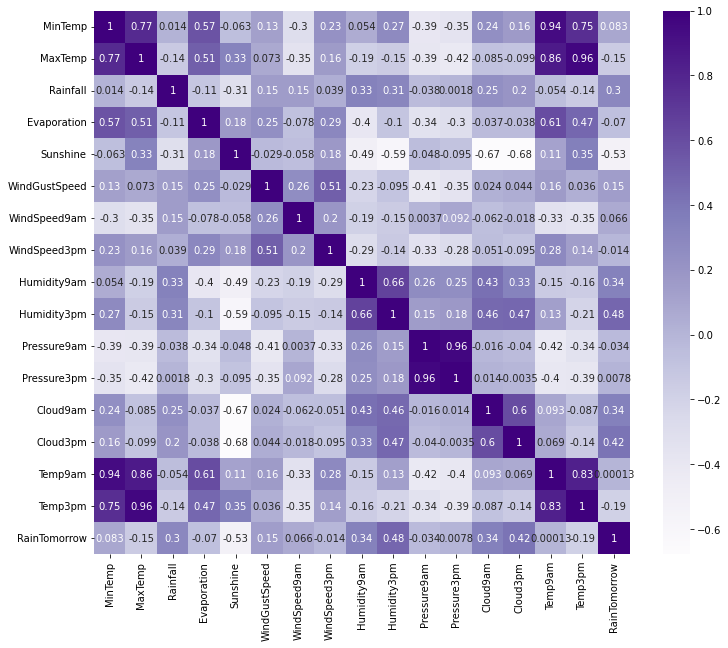

In [12]:
plt.figure(figsize=(12,10))
cor = df_lean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

With Pearson coefficient the correlations can be between -1 and 1. When the coefficient is **closer to -1** this symbolises **strong negative correlation** and similarly with the coefficient **closer to 1** this shows **strong positive correlation**. A Pearson coefficient of 0 shows no correlation. <br>

We just want to focus on the highly negative or positive correlations between the dependent variable (Rain Tomorrow) and the 16 independent variables to see how they get along. 

In [13]:
cor_target = abs(cor["RainTomorrow"])
relevant_features = cor_target[cor_target>0.4] 
print("Correlated Variables Are:\n",relevant_features)

Correlated Variables Are:
 Sunshine        0.529112
Humidity3pm     0.477580
Cloud3pm        0.415801
RainTomorrow    1.000000
Name: RainTomorrow, dtype: float64


We have identified 3 independent variables that have a high absolute value of correlation with the dependent variable. Next, we need to check for **Multicollinearity** within these independent variables to ensure they're not highly correlated with one another. If we do pick 2 variables that are highly correlated it will be hard for us to pinpoint which of those variables impacts the dependent variable and this ultimately will hinder the reliability of our model

In [14]:
print(df_lean[["Sunshine","Humidity3pm"]].corr())   
print(df_lean[["Sunshine","Cloud3pm"]].corr())     
print(df_lean[["Humidity3pm","Cloud3pm"]].corr())   

             Sunshine  Humidity3pm
Sunshine     1.000000    -0.586476
Humidity3pm -0.586476     1.000000
          Sunshine  Cloud3pm
Sunshine  1.000000 -0.677861
Cloud3pm -0.677861  1.000000
             Humidity3pm  Cloud3pm
Humidity3pm     1.000000  0.472248
Cloud3pm        0.472248  1.000000


We can see that **Sunshine has a high negative correlation with both Humidity3pm & Cloud3pm**, therefore Sunshine should be discounted from the MLR model as this can result in Multicollinearity. We'll proceed with using just two independent variables, Humidity3pm & Cloud3pm.<br>

We'll save these 2 independent variables into an array X. Due to the large differences in values & ranges between the 2 columns it'll be good practice to standardize these columns and put them on a similar scale

In [15]:
X = np.asanyarray(df_lean[['Humidity3pm','Cloud3pm']])
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))   

Similarly our dependent variable  we'll put into an array called Y.

In [16]:
Y = np.asanyarray(df_lean[['RainTomorrow']])

Next, we'll utilise the `train_test_split` package from `skearn` to create a **training set** with 80% of the total data and a **test set** with the remaining 20%. We'll use a random state of 10 to create these sets 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

With our training data let's create a MLR model and find the key parameters for our prediction line 

In [18]:
LinearReg = linear_model.LinearRegression()
LinearReg.fit(X_train, Y_train)  

print ('Coefficients: ', LinearReg.coef_) 
print ('Intercepts: ', LinearReg.intercept_)

Coefficients:  [[0.15637403 0.1027266 ]]
Intercepts:  [0.25568515]


Using the above inputs, we can write an equation of our line    

### Rain Tomorrow = 0.26 + (0.16 x Humidity3pm) + (0.10 x Cloud3pm)

Using our model created from **X_train**, we can now look to test it using our test data, **X_test**, to produce values for the dependent variable, which we'll call **Y_hat**. We'll be able to compare these values to our testing dependent variables **Y_test** to see how effective the model is. A good way to do this is plotting the actual values, **Y_test** and fitted values, **Y_hat**  on a histogram line chart and comparing the frequency of values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


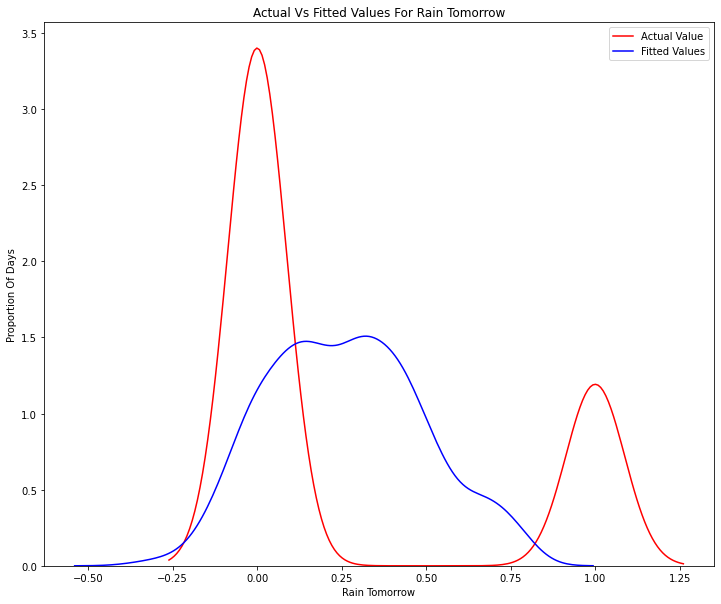

In [19]:
Y_hat= LinearReg.predict(X_test) 

width = 12
height = 10
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df_lean['RainTomorrow'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual Vs Fitted Values For Rain Tomorrow')
plt.legend(loc="upper right")
plt.xlabel('Rain Tomorrow')
plt.ylabel('Proportion Of Days')
plt.show()

From the above histogram line plot, we can see that for the actual values we have frequencies of either 0 (No Rain) or 1 (Rain). When looking at our fitted values created from our MLR we can see a more continuous trend line that is not so binary. This is another prove case of why a MLR model may not be the best model for us to use. 

Our final step with the MLR model is looking at a few performance metrics that will calculate the accuracy of the model based on the predictive error of our values. There is 3 main metrics I will be looking to calculate; **Mean Absolute Error (MAE) , Mean Squared Error (MSE) & $R ^{2}$**  

**Mean Absolute Error** calculates the average absolute difference between the actual values and the fitted values. A smaller MAE value indicates the actual values are close to the predicted values

In [20]:
np.mean(np.absolute(Y_hat - Y_test))

0.29871793768155463

**Mean Squared Error** is similar to the MAE, however the absolute difference is squared. Therefore, large variances will be severely impacted by this. A lower MSE indicates a more accurate model

In [21]:
np.mean((Y_hat -Y_test)**2)

0.13729824169135424

**$R ^{2}$** ultimately tells us how well the data fits the MLR model. $R ^{2}$ values fall between 0 and 1. If we have a $R ^{2}$ of 1 this means that all predictive values are identical to the actual values.

In [22]:
r2_score(Y_test, Y_hat) 

0.32031318492530614

We can see that MAE & MSE are small values, this would usually indicate an accurate model. However, the $R ^{2}$ score is rather low at 0.32. I would take these metrics with a pinch of salt as the dependent variable is discrete and not continuous and this can skew the statistical tests.  

## <u>2) Logistic Regression

As mentioned prior, naturally when your dependent variable only takes 2 values it would make sense to use a **Logistic Regression (LR) model**. Let's make a LR model using the same independent variables and training data we used for the MLR. We'll also use the same test data when carrying out our analysis for the efficiency of the model. (Of course, our predicative dependent values, Y hat, will be different)

Firstly, let's plot one of the independent variables against the dependent variable to see the curvature of the plot 

<AxesSubplot:xlabel='Humidity3pm', ylabel='RainTomorrow'>

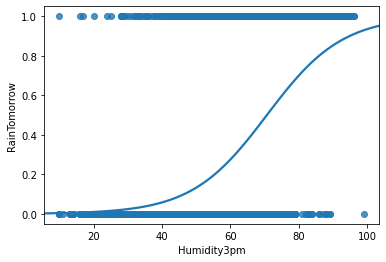

In [23]:
humidity = df_lean['Humidity3pm']
rain_tomorrow = df_lean['RainTomorrow']
sns.regplot(x=humidity, y=rain_tomorrow, data=df_lean, logistic=True, ci=None, truncate= False)

We can see that this displays the expected "S" curvature we come to expect from a logistic regression plot. Let's proceed and build the LR model using our training data. <br>*Note. For Y train we need to flatten the variable so we can process it into the LR model*

In [24]:
Y_train = Y_train[:, 0]
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train) 

Let’s use our trained LR model and produce fitted values (Y_hat). This will be different to the fitted values from the MLR as the values here will be either 0 or 1. We can also calculate the probability of what value y_hat will be.

In [25]:
Y_hat = LR.predict(X_test)
Y_hat_Prob = LR.predict_proba(X_test)

We can produce a **confusion matrix** to help us visualise the fitted vs actual values for the dependent variable. We'll be able to quickly see which values have been correctly and incorrectly classified. <br>

The below is a basic way to quickly produce the absolute values for a confusion matrix in Python, later in this exercise I'll demonstrate another way to lay out a confusion matrix.

In [26]:
Y_test = Y_test[:, 0]
y_actual = pd.Series(Y_test, name='Actual')
y_predicted = pd.Series(Y_hat, name='Predicted')
print(pd.crosstab(y_actual, y_predicted))

Predicted    0   1
Actual            
0          440  31
1           95  89


We can deduce that **81% of the predications have been correctly classified**, ((440+89) / (440+31+95+89)) * 100. This is known as the **accuracy score**. Accuracy score usually works well when the confusion matrix is balanced, but in our case, it is not so we need to dig a little bit deeper <br>

We can also calculate the **precision** (correct positive predictions relative to total positive predictions) and **recall** (correct positive predictions relative to total actual positives) of the confusion matrix through similar calculations. Luckily for us there is built in libraries that can quickly calculate this


In [27]:
LR_Acc = metrics.accuracy_score(y_actual, y_predicted)
print("Accuracy:", LR_Acc)

LR_Prec = metrics.precision_score(y_actual, y_predicted)
print("Precision:", LR_Prec)

LR_Recal = metrics.recall_score(y_actual, y_predicted)
print("Recall:", LR_Recal)

LR_F1 = f1_score(y_actual, y_predicted, average='weighted')
print("F1 Score:", LR_F1)

Accuracy: 0.8076335877862595
Precision: 0.7416666666666667
Recall: 0.483695652173913
F1 Score: 0.7935035028878555


We can see that we've got a **high precision but a low recall** in our model. This means when the model predicts it'll rain tomorrow it is correct 74% of the time. But out of all possible days it could rain tomorrow it can only identify 48% of these days.<br>

The **F1 score** takes into consideration both the precision and recall of a model to give an overall score. A F1 score of 1.0 means we've got perfect precision & recall in a model (usually very unlikely to ever happen). Focusing on our F1 score of 0.8, this shows us our model performs well overall. 

## <u>3) KNN - K Nearest Neighbour

Our third choice of model we'll be looking at is again another supervised learning model that uses proximity of points to help classify results. For the **K Nearest Neighbour (KNN) model**, we'll be looking at including all of our independent variables this time.<br>

We'll produce a training class of 80% and use the remaining 20% of data to test the KNN model

In [28]:
X = np.asanyarray(df_lean)
X =X[:,0:16]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 

Y = np.asanyarray(df_lean[['RainTomorrow']])

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

Next, we need to decide our value for K. Using this value of K, the model will look to classify a point based on the K points surrounding it.<br>

Let’s start with **K = 4** and build our model.


In [29]:
k = 4
Y_train = Y_train[:, 0]
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)


Like we've done before, let's predict **y_hat** using **X_test** data

In [30]:
y_hat = neigh.predict(X_test) 

Like Logistic Regression we can quickly calculate some metrics

In [31]:
KNN_Acc = metrics.accuracy_score(Y_test, y_hat)
print("Accuracy:", KNN_Acc)

KNN_Prec = metrics.precision_score(Y_test, y_hat)
print("Precision:", KNN_Prec)

KNN_Recal = metrics.recall_score(Y_test, y_hat)
print("Recall:", KNN_Recal)

KNN_F1 = f1_score(Y_test, y_hat, average='weighted')
print("F1 Score:", KNN_F1)



Accuracy: 0.8290076335877863
Precision: 0.8141592920353983
Recall: 0.5027322404371585
F1 Score: 0.8146910449905165


We can see that all metrics have performed slightly better when compared to the logistic regression model. A KNN model could be a good ML model to use to help us predict Rain tomorrow.<br>

On a side note, say we wanted to **optimise the value of K** to give us the **highest possible accuracy rate**. We can iterate through different values of K to do just that


Highest Accuracy Score Is 0.8412213740458016 Using k= 9


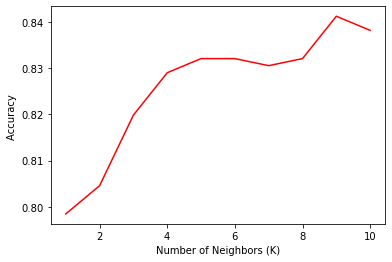

In [32]:
Ks = 11
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_hat)
    
mean_acc


plt.plot(range(1,Ks),mean_acc,'r')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')


print( "Highest Accuracy Score Is", mean_acc.max(), "Using k=", mean_acc.argmax()+1) 


Iterating through values of K and plotting the accuracy score on a line graph we can see that the **optimum value for K is 9**.<br>

It is better using a higher value for K as this will take into consideration a greater range of values when classifying. If the K value is low, we can misinterpret results by noisy / outlying data

## <u>4) Decision Trees

The final ML we'll be looking at is **Decision Trees (DT)**. Decision trees are fantastic at visualising characteristics of data and presenting them in a way which is easy to understand by non-mathematical people via the easy-to-follow flow chart like structure. We can take large quantities of data (numerical and categorical) and with a few lines of code we can have a fully built decisional tree of numerous depths.<br>

Again, like KNN let's use all variables as our independent values. For simplicity we'll create our DT with a depth of 3 tiers


In [33]:
X = np.asanyarray(df_lean)
X =X[:,0:16]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))  

Y = np.asanyarray(df_lean[['RainTomorrow']])

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)     
Tree.fit(X_train,Y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Let's visualise the decision tree using `tree.plot_tree`

[Text(0.5, 0.875, 'node #0\nSunshine <= -0.136\nsamples = 2616\nvalue = [1950, 666]\nclass = No Rain Tomorrow'),
 Text(0.25, 0.625, 'node #1\nHumidity3pm <= 1.155\nsamples = 986\nvalue = [481, 505]\nclass = Rain Tomorrow'),
 Text(0.125, 0.375, 'node #2\nRainfall <= -0.125\nsamples = 710\nvalue = [442, 268]\nclass = No Rain Tomorrow'),
 Text(0.0625, 0.125, 'node #3\nsamples = 505\nvalue = [354, 151]\nclass = No Rain Tomorrow'),
 Text(0.1875, 0.125, 'node #4\nsamples = 205\nvalue = [88, 117]\nclass = Rain Tomorrow'),
 Text(0.375, 0.375, 'node #5\nHumidity3pm <= 1.524\nsamples = 276\nvalue = [39, 237]\nclass = Rain Tomorrow'),
 Text(0.3125, 0.125, 'node #6\nsamples = 95\nvalue = [26, 69]\nclass = Rain Tomorrow'),
 Text(0.4375, 0.125, 'node #7\nsamples = 181\nvalue = [13, 168]\nclass = Rain Tomorrow'),
 Text(0.75, 0.625, 'node #8\nSunshine <= 0.703\nsamples = 1630\nvalue = [1469, 161]\nclass = No Rain Tomorrow'),
 Text(0.625, 0.375, 'node #9\nTemp9am <= 0.006\nsamples = 826\nvalue = [688, 

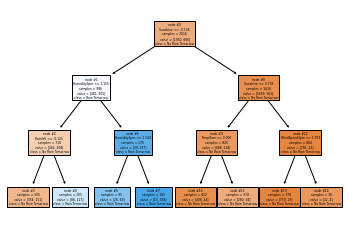

In [34]:
all_columns = df_lean.columns.values.tolist()
feature_names = all_columns[0:16]

class_names =  ['No Rain Tomorrow', 'Rain Tomorrow']

tree.plot_tree(Tree,
                feature_names = feature_names,
                class_names=class_names,
                filled=True,
                node_ids=True,
                impurity=False,
                label="all")

Above we can see our DT along with the class it falls into (Rain or No Rain Tomorrow). We specified a tree depth of 3 and we can see all the possible outcomes of the tree on the final tier. The outcomes on the final tier of the decision tree are known as the **terminal nodes**. <br>

I'm not a big fan of the built-in tree as the size of it is quite small. Another method of producing a decision tree is using an online viewer (https://dreampuf.github.io/GraphvizOnline). Using the text file created below on the variable **tree_code** we can copy and paste this into the online viewer to produce a better-quality decision tree. The long URL below will direct you to this tree.


In [35]:
tree_code = tree.export_graphviz(Tree, out_file=None, 
                      feature_names=feature_names,  
                    class_names=class_names,  
                    filled=True, rounded=True,  
                      special_characters=True) 

https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%2C%20style%3D%22filled%2C%20rounded%22%2C%20color%3D%22black%22%2C%20fontname%3D%22helvetica%22%5D%20%3B%0D%0Aedge%20%5Bfontname%3D%22helvetica%22%5D%20%3B%0D%0A0%20%5Blabel%3D%3CSunshine%20%26le%3B%20-0.136%3Cbr%2F%3Eentropy%20%3D%200.818%3Cbr%2F%3Esamples%20%3D%202616%3Cbr%2F%3Evalue%20%3D%20%5B1950%2C%20666%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23eeac7d%22%5D%20%3B%0D%0A1%20%5Blabel%3D%3CHumidity3pm%20%26le%3B%201.155%3Cbr%2F%3Eentropy%20%3D%201.0%3Cbr%2F%3Esamples%20%3D%20986%3Cbr%2F%3Evalue%20%3D%20%5B481%2C%20505%5D%3Cbr%2F%3Eclass%20%3D%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23f6fafe%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A2%20%5Blabel%3D%3CRainfall%20%26le%3B%20-0.125%3Cbr%2F%3Eentropy%20%3D%200.956%3Cbr%2F%3Esamples%20%3D%20710%3Cbr%2F%3Evalue%20%3D%20%5B442%2C%20268%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23f5cdb1%22%5D%20%3B%0D%0A1%20-%3E%202%20%3B%0D%0A3%20%5Blabel%3D%3Centropy%20%3D%200.88%3Cbr%2F%3Esamples%20%3D%20505%3Cbr%2F%3Evalue%20%3D%20%5B354%2C%20151%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23f0b78d%22%5D%20%3B%0D%0A2%20-%3E%203%20%3B%0D%0A4%20%5Blabel%3D%3Centropy%20%3D%200.986%3Cbr%2F%3Esamples%20%3D%20205%3Cbr%2F%3Evalue%20%3D%20%5B88%2C%20117%5D%3Cbr%2F%3Eclass%20%3D%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23cee7f9%22%5D%20%3B%0D%0A2%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%3CHumidity3pm%20%26le%3B%201.524%3Cbr%2F%3Eentropy%20%3D%200.588%3Cbr%2F%3Esamples%20%3D%20276%3Cbr%2F%3Evalue%20%3D%20%5B39%2C%20237%5D%3Cbr%2F%3Eclass%20%3D%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%235aade9%22%5D%20%3B%0D%0A1%20-%3E%205%20%3B%0D%0A6%20%5Blabel%3D%3Centropy%20%3D%200.847%3Cbr%2F%3Esamples%20%3D%2095%3Cbr%2F%3Evalue%20%3D%20%5B26%2C%2069%5D%3Cbr%2F%3Eclass%20%3D%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%2384c2ef%22%5D%20%3B%0D%0A5%20-%3E%206%20%3B%0D%0A7%20%5Blabel%3D%3Centropy%20%3D%200.373%3Cbr%2F%3Esamples%20%3D%20181%3Cbr%2F%3Evalue%20%3D%20%5B13%2C%20168%5D%3Cbr%2F%3Eclass%20%3D%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%2348a5e7%22%5D%20%3B%0D%0A5%20-%3E%207%20%3B%0D%0A8%20%5Blabel%3D%3CSunshine%20%26le%3B%200.703%3Cbr%2F%3Eentropy%20%3D%200.465%3Cbr%2F%3Esamples%20%3D%201630%3Cbr%2F%3Evalue%20%3D%20%5B1469%2C%20161%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23e88f4f%22%5D%20%3B%0D%0A0%20-%3E%208%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A9%20%5Blabel%3D%3CTemp9am%20%26le%3B%200.006%3Cbr%2F%3Eentropy%20%3D%200.651%3Cbr%2F%3Esamples%20%3D%20826%3Cbr%2F%3Evalue%20%3D%20%5B688%2C%20138%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23ea9a61%22%5D%20%3B%0D%0A8%20-%3E%209%20%3B%0D%0A10%20%5Blabel%3D%3Centropy%20%3D%200.461%3Cbr%2F%3Esamples%20%3D%20452%3Cbr%2F%3Evalue%20%3D%20%5B408%2C%2044%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23e88f4e%22%5D%20%3B%0D%0A9%20-%3E%2010%20%3B%0D%0A11%20%5Blabel%3D%3Centropy%20%3D%200.813%3Cbr%2F%3Esamples%20%3D%20374%3Cbr%2F%3Evalue%20%3D%20%5B280%2C%2094%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23eeab7b%22%5D%20%3B%0D%0A9%20-%3E%2011%20%3B%0D%0A12%20%5Blabel%3D%3CWindSpeed3pm%20%26le%3B%201.973%3Cbr%2F%3Eentropy%20%3D%200.187%3Cbr%2F%3Esamples%20%3D%20804%3Cbr%2F%3Evalue%20%3D%20%5B781%2C%2023%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23e6853f%22%5D%20%3B%0D%0A8%20-%3E%2012%20%3B%0D%0A13%20%5Blabel%3D%3Centropy%20%3D%200.166%3Cbr%2F%3Esamples%20%3D%20778%3Cbr%2F%3Evalue%20%3D%20%5B759%2C%2019%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23e6843e%22%5D%20%3B%0D%0A12%20-%3E%2013%20%3B%0D%0A14%20%5Blabel%3D%3Centropy%20%3D%200.619%3Cbr%2F%3Esamples%20%3D%2026%3Cbr%2F%3Evalue%20%3D%20%5B22%2C%204%5D%3Cbr%2F%3Eclass%20%3D%20No%20Rain%20Tomorrow%3E%2C%20fillcolor%3D%22%23ea985d%22%5D%20%3B%0D%0A12%20-%3E%2014%20%3B%0D%0A%7D

Let's calculate y_hat using the test data

In [36]:
y_hat = Tree.predict(X_test) 

Let's calculate our metrics

In [37]:
DT_Acc = metrics.accuracy_score(Y_test, y_hat)
print("Accuracy:", DT_Acc)

DT_Prec = metrics.precision_score(Y_test, y_hat)
print("Precision:", DT_Prec)

DT_Recal = metrics.recall_score(Y_test, y_hat)
print("Recall:", DT_Recal)

DT_F1 = f1_score(Y_test, y_hat, average='weighted')
print("F1 Score:", DT_F1)

Accuracy: 0.8229007633587786
Precision: 0.7375886524822695
Recall: 0.5683060109289617
F1 Score: 0.8151939995675963


Like we demonstrated for Logistic Regression we can compile a confusion matrix to compare the actual vs predicted values of our decision tree

In [38]:
Y_test = Y_test[:, 0]
y_actual = pd.Series(Y_test, name='Actual')
y_predicted = pd.Series(y_hat, name='Predicted')
print(pd.crosstab(y_actual, y_predicted))

Predicted    0    1
Actual             
0          435   37
1           79  104


We can take this one step further, say instead of using the absolute numbers we can work out the % distribution for each row and see the likelihood of each event happening

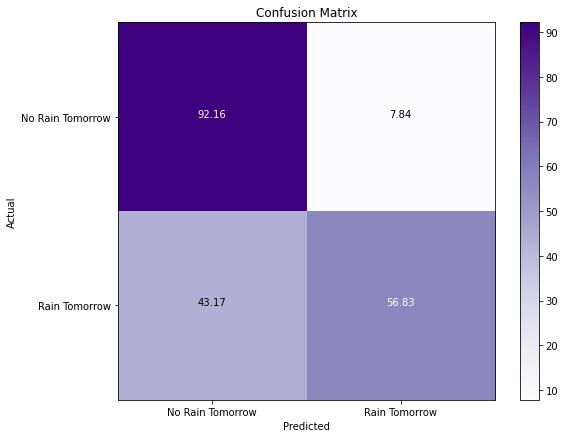

In [39]:
a_confusion_matrix = confusion_matrix(Y_test, y_hat)

title = 'Confusion Matrix'
cmap = plt.cm.Purples

plt.figure(figsize=(8, 6))
a_confusion_matrix = (
    a_confusion_matrix.astype('float') / a_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(a_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

fmt = '.2f'
thresh = a_confusion_matrix.max() / 2.
for i, j in itertools.product(range(a_confusion_matrix.shape[0]), range(a_confusion_matrix.shape[1])):
    plt.text(j, i, format(a_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if a_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()


We can deduce above that when there is no rain tomorrow (row 1), the model is pretty good at predicting this. But when there is rain tomorrow (row 2), the model 43% of the time will make an incorrect forecast. Due to a high % value in the bottom left, also known as our **False Negative**, this means the model has a **low recall score** as we identified above

## <u>Conclusion

We have produced 4 different types of models to help us predict our dependent variable (Rain tomorrow). Albeit the first model, multiple linear regression (MLR) was created as an exercise piece. We can still focus on our other 3 supervised learning models, **Logistic Regression (LR)**, **K-Nearest Neighbour (KNN)** & **Decisional Tree (DT)** to help us choose the machine learning model we'll like to use. <br>

For those 3 models we've been calculating various performance metrics; **Accuracy**, **Precision**, **Recall** and **F1 Score**.<br>

Let's summarize all of these scores in a tabular format for us to compare using `tabulate`

In [40]:
print(tabulate([['Logistic Regression (LR)', LR_Acc, LR_Prec, LR_Recal, LR_F1],
                ['K Nearest Neighbour (KNN)', KNN_Acc, KNN_Prec, KNN_Recal, KNN_F1],
                ['Decision Trees (DT)', DT_Acc, DT_Prec, DT_Recal, DT_F1]],
                headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))

Model                        Accuracy    Precision    Recall    F1 Score
-------------------------  ----------  -----------  --------  ----------
Logistic Regression (LR)     0.807634     0.741667  0.483696    0.793504
K Nearest Neighbour (KNN)    0.829008     0.814159  0.502732    0.814691
Decision Trees (DT)          0.822901     0.737589  0.568306    0.815194


Reviewing the information above we can identify that KNN & DT are stronger models to use when compared to LR. Now, between KNN & DT we can see that the Accuracy & F1 Score is similar. The only differences ultimately are between the precision and recall of the two models. 

**In layman’s terms do we want a model that is good at identifying all days that it will rain tomorrow (high recall) or a model that is good at predicting which day it'll rain tomorrow (high precision). **

In our case missing out on identifying some rainy days tomorrow is okay (low recall) but knowing when it’s going to rain tomorrow (high precision) would be more important to us. This is especially crucial if we're planning when to hold a cricket match and we need to predict a day, with a high chance of accuracy, if there will be rain or not. Our best bet would be to use the **K Nearest Neighbour model** to predict this as this has a higher level of precision